# Week 6 HW: Create visualizations of Kmeans Clustering

In [1]:
from sklearn.datasets import load_iris, load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
X = preprocessing.scale(X)

In [4]:
kmeans_cluster = KMeans(n_clusters=3, random_state=0).fit(X)

In [5]:
kmeans_pred=kmeans_cluster.labels_ #saved kmeans labels as array

In [6]:
kmeans_center=kmeans_cluster.cluster_centers_ #saved kmeans centers as array

In [7]:
#combine raw data and prediction from kmeans cluster
df_for_scatter=pd.DataFrame(np.concatenate((X,kmeans_pred[:, None]), axis=1))

In [8]:
#rename column headers
df_for_scatter.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

1. Plot all 6 variable combos to see how clustering looks for each combination.
    Would like to add legend but dont know how

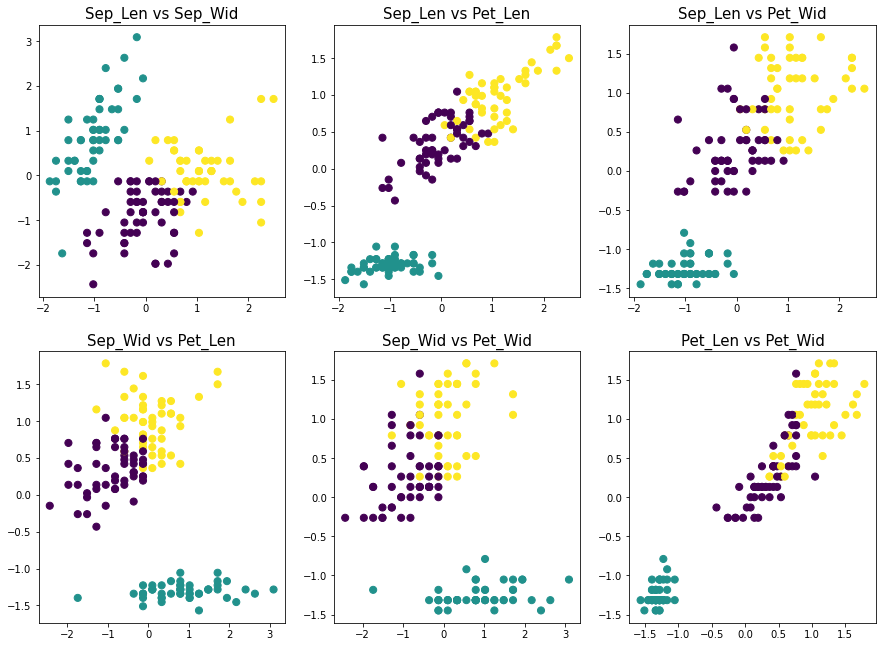

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 11))
names = ['Sep_Len vs Sep_Wid', 'Sep_Len vs Pet_Len', 'Sep_Len vs Pet_Wid', 'Sep_Wid vs Pet_Len', 'Sep_Wid vs Pet_Wid', 'Pet_Len vs Pet_Wid']

def irisplots(pos1, pos2, x,y,lbl):
    axes[pos1, pos2].scatter(x,y, s=50, c='species', data=df_for_scatter )
    axes[pos1, pos2].set_title(names[lbl], fontsize=15);

test=irisplots(0, 0,'sepal_length', 'sepal_width', 0)
irisplots(0, 1,'sepal_length', 'petal_length', 1)
irisplots(0, 2,'sepal_length', 'petal_width', 2)
irisplots(1, 0,'sepal_width', 'petal_length', 3)
irisplots(1, 1,'sepal_width', 'petal_width', 4)
irisplots(1, 2,'petal_length', 'petal_width', 5)

plt.show()

2. Plot 1 variable combination and add in titles, lables and legend. Notice legend is inside graph - no good

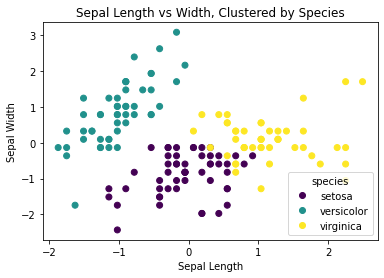

In [9]:
labels = ["setosa", "versicolor", "virginica"]

scatter = plt.scatter('sepal_length','sepal_width', c='species', label=labels, data=df_for_scatter)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Width, Clustered by Species")
plt.legend(handles=scatter.legend_elements()[0], 
           labels=labels,
           title="species",
           loc='best')

plt.show()

3. Take Graph #2 above and add centroids

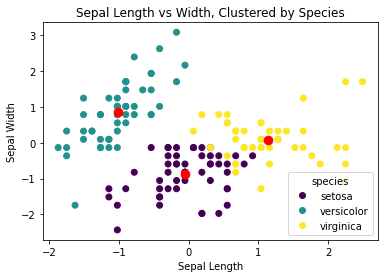

In [10]:
labels = ["setosa", "versicolor", "virginica"]
scatter = plt.scatter('sepal_length','sepal_width', c='species', label=labels, data=df_for_scatter)
scatter2=plt.scatter(kmeans_cluster.cluster_centers_[:, 0], kmeans_cluster.cluster_centers_[:,1], s = 75, c = 'red')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Width, Clustered by Species")
plt.legend(handles=scatter.legend_elements()[0], 
           labels=labels,
           title="species",
           loc='best')
#plt.legend(handles=scatter2.legend_elements()[0], 
#           labels=labels2,
#           title="species",
#          loc='best', fontsize=10)

plt.show()

4. Use seaborn to move legend outside of plot. Looks nicer, but had to create new var that maps the species based on the number

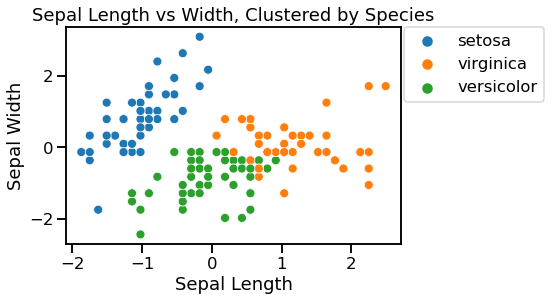

In [11]:
a =  { 0 : 'versicolor',  1 : 'setosa', 2: 'virginica'}
df_for_scatter['species2'] = df_for_scatter['species'].map(a)

sns.set_context("talk")
sns.scatterplot(x='sepal_length',y='sepal_width', hue='species2', data=df_for_scatter)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Width, Clustered by Species")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

5. Add centroids to graph above

In [12]:
#create dataframe for centers and then add to df_for_scatter
centroids = pd.DataFrame(kmeans_center, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
centroids["species2"] = ["versicolor centroid", "setosa centroid", "virginica centroid"]
full_ds = pd.concat([df_for_scatter, centroids], ignore_index=True)
full_ds=full_ds.drop('species', axis=1, inplace=False)

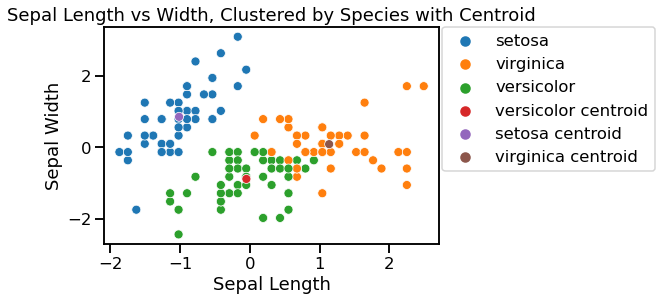

In [13]:
sns.scatterplot(x='sepal_length',y='sepal_width', hue='species2', data=full_ds)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Width, Clustered by Species with Centroid")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

6. Make all plot combinations

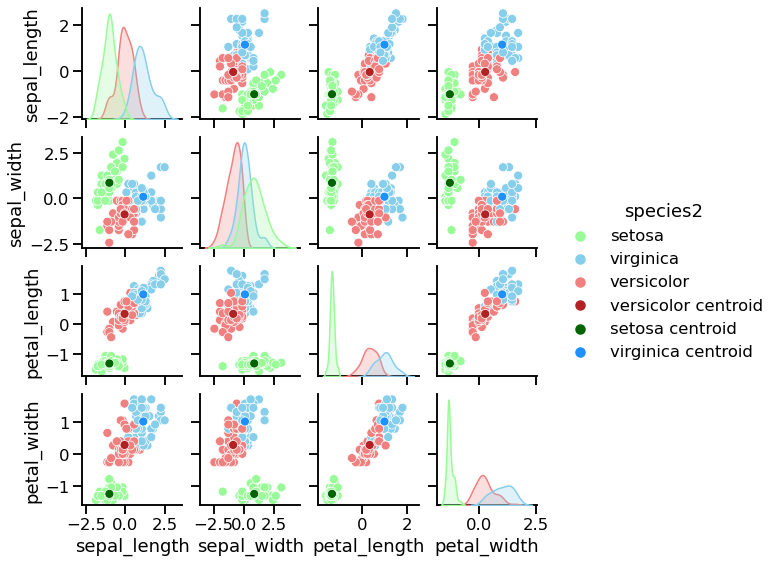

In [14]:
color_dict = dict({'versicolor':'lightcoral',
                  'setosa':'palegreen',
                  'virginica': 'skyblue',
                  'versicolor centroid': 'firebrick',
                   'setosa centroid': 'darkgreen',
                   'virginica centroid': 'dodgerblue'})
sns.pairplot(full_ds, hue="species2", height = 2, palette = color_dict)

# Stuff from the internet**

Alternate versions we found online - giving different ways to graph the iris data. Kept this with the graphs we made above because it will be  good for future reference.   

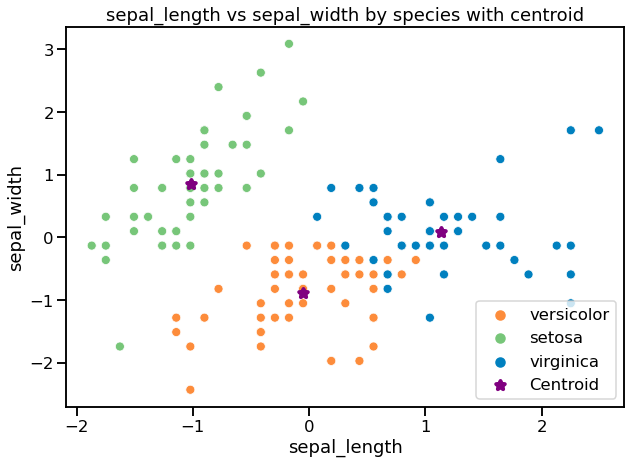

In [15]:
#create species datasets and then use those in scatterplots
st0 = df_for_scatter[df_for_scatter['species2'] == 'versicolor']
st1 = df_for_scatter[df_for_scatter['species2'] == 'setosa']
st2 = df_for_scatter[df_for_scatter['species2'] == 'virginica']
plt.figure(figsize=(10,7))
sns.scatterplot(data=st0,x='sepal_length',y='sepal_width',palette='Oranges',hue='species2')
sns.scatterplot(data=st1,x='sepal_length',y='sepal_width',palette='YlGn',hue='species2')
sns.scatterplot(data=st2,x='sepal_length',y='sepal_width',palette='winter',hue='species2')

plt.scatter(kmeans_center[:,0],kmeans_center[:,1],marker='*',linewidth=4,color='purple',label='Centroid')
plt.title('sepal_length vs sepal_width by species with centroid')
plt.legend()
plt.show()

*This was showing the classification at beginning and then after kcluster.  
This was interesting as you could see points that had changed
however, the colors switch from the first graph to the second which is confusing

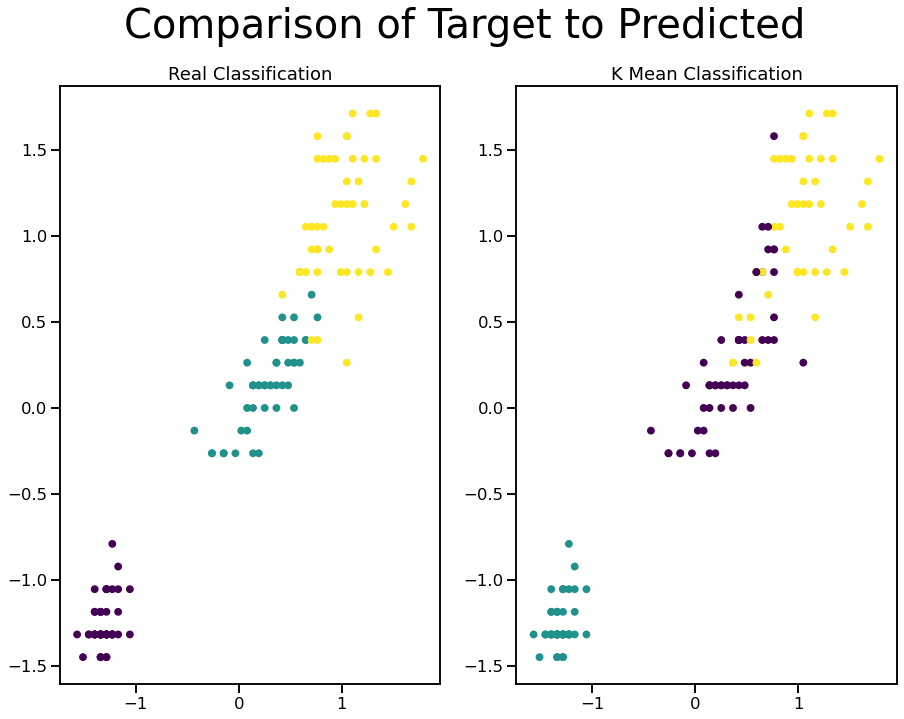

In [16]:
y = pd.DataFrame(y)
y.columns = ["target"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 11))
fig.suptitle("Comparison of Target to Predicted", fontsize=40)
df_targ=pd.DataFrame(np.concatenate((X,y), axis=1))
df_targ.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
axes[0].scatter(df_targ.petal_length, df_targ.petal_width, c=df_targ.target, s=40)
axes[0].set_title('Real Classification')

# Plot Predicted with corrected values
kmeans_pred2=pd.DataFrame(kmeans_pred)
kmeans_pred2.columns = ["pred"]
axes[1].scatter(df_targ.petal_length, df_targ.petal_width, c=kmeans_pred2.pred, s=40)
axes[1].set_title('K Mean Classification');

This is a really good article for visualizing the iris data that helped to switch the colors

https://notebook.community/gregoryg/cdh-projects/notebooks/jupyter/datascience/K%20Means%20Cluster%20Visualization

"Here we are going to change the class labels, we are not changing the any of the classification groups we are simply giving each group the correct number. We need to do this for measuring the performance. Using this code below we using the np.choose() to assign new values, basically we are changing the 1’s in the predicted values to 0’s and the 0’s to 1’s. Class 2 matched so we can leave. By running the two print functions you can see that all we have done is swap the values."

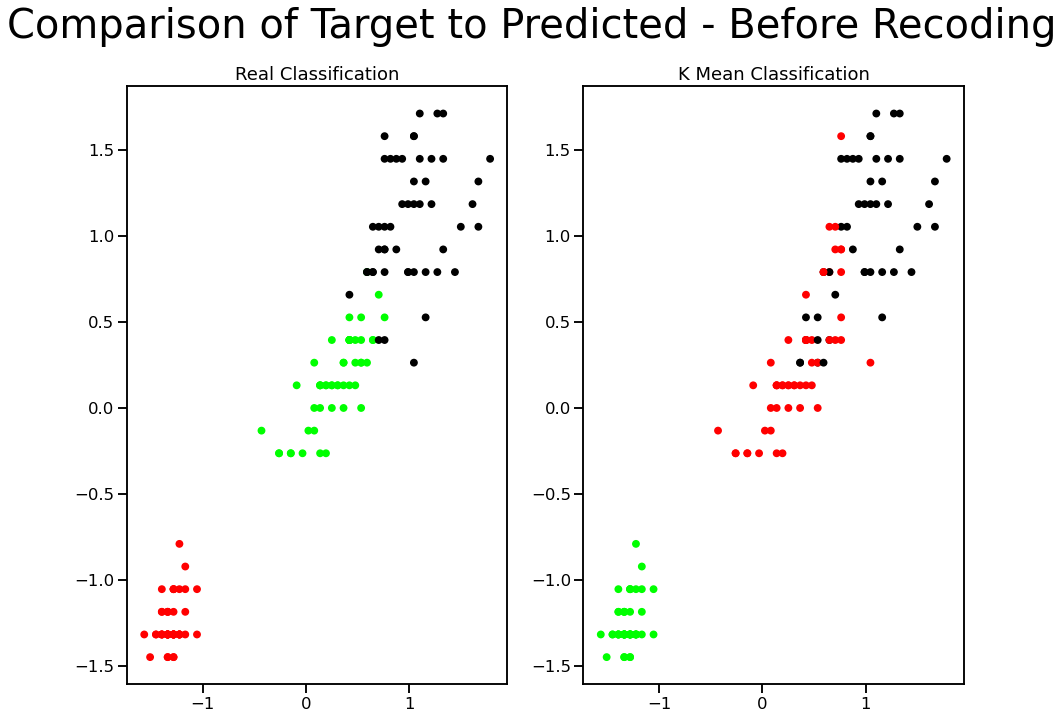

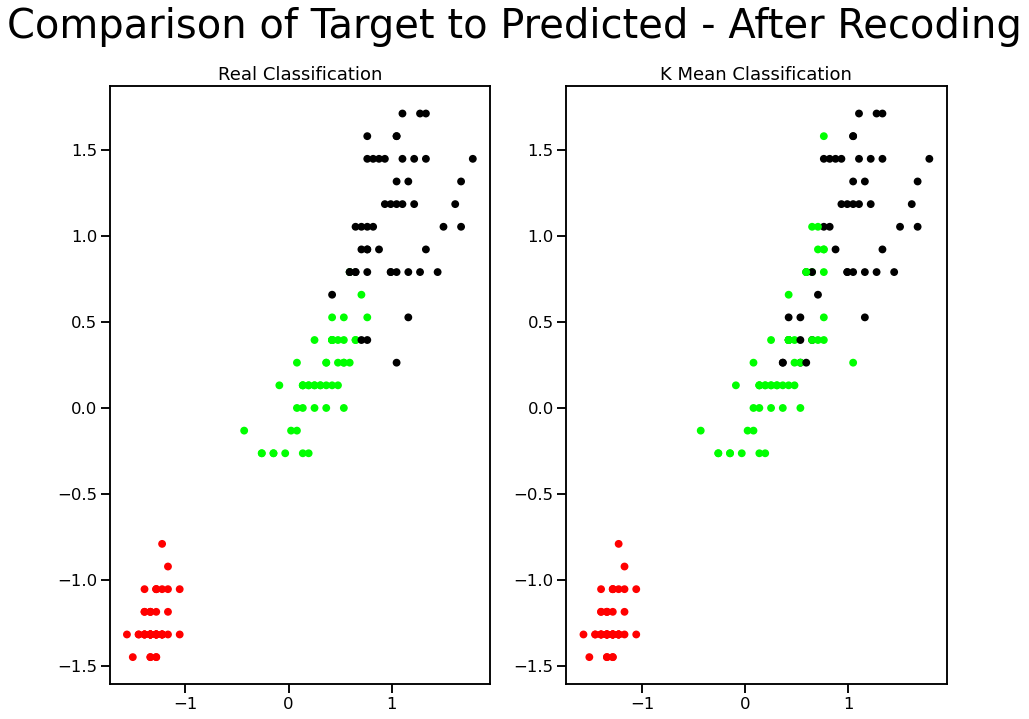

In [17]:
#note - had to change y to dataframe.  also, even though target is in df_targ
#had to use the dataframe created to do the array colors.  when you do np.array it has to be single column
#if you ran the colormap line of code using df_targ it doesn't like it

# would like to be able to add legend but struggled....................
#tried just adding fig.legend() but gave message about handles.  Need to get a better understanding on that........

colormap = np.array(['red', 'lime', 'black'])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 11))
fig.suptitle("Comparison of Target to Predicted - Before Recoding", fontsize=40)
df_targ=pd.DataFrame(np.concatenate((X,y), axis=1))
df_targ.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
axes[0].scatter(df_targ.petal_length, df_targ.petal_width, c=colormap[y.target], s=40)
axes[0].set_title('Real Classification')

# Plot Predicted with corrected values
axes[1].scatter(df_targ.petal_length, df_targ.petal_width, c=colormap[kmeans_cluster.labels_], s=40)
axes[1].set_title('K Mean Classification');

#recode data
predY = np.choose(kmeans_cluster.labels_, [1, 0, 2]).astype(np.int64)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 11))
fig.suptitle("Comparison of Target to Predicted - After Recoding", fontsize=40)
axes[0].scatter(df_targ.petal_length, df_targ.petal_width, c=colormap[y.target], s=40)
axes[0].set_title('Real Classification')

# Plot Predicted with corrected values
axes[1].scatter(df_targ.petal_length, df_targ.petal_width, c=colormap[predY], s=40)
axes[1].set_title('K Mean Classification');

In [24]:
#correlations of data
df_for_scatter.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.458215
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.416708
petal_length,0.871754,-0.428440,1.000000,0.962865,0.232075
petal_width,0.817941,-0.366126,0.962865,1.000000,0.268973
species,0.458215,0.416708,0.232075,0.268973,1.000000


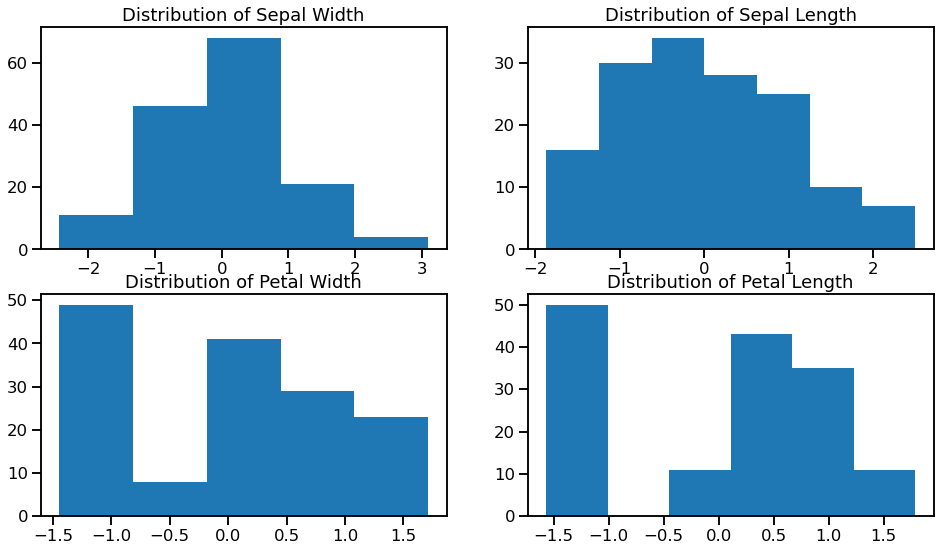

In [25]:
#histograms of data
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df_for_scatter['sepal_width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df_for_scatter['sepal_length'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df_for_scatter['petal_width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df_for_scatter['petal_length'], bins=6);

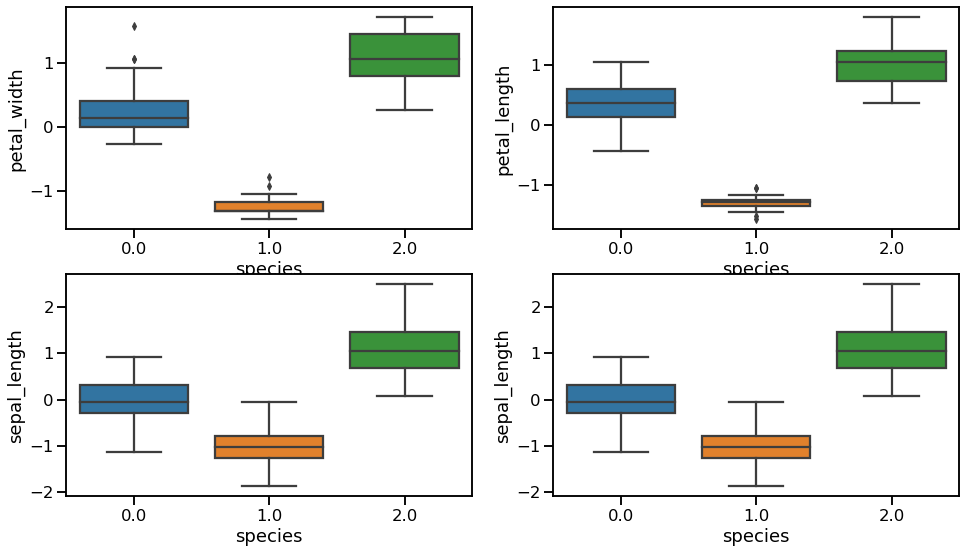

In [26]:
#boxplots
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_width", x= "species", data=df_for_scatter,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=df_for_scatter,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_length", x= "species", data=df_for_scatter,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_length", x= "species", data=df_for_scatter,  orient='v' , ax=axes[1, 1])
plt.show()

In [18]:
#cross tabs of real/predicted - combine real/predicted columns
dfpred=pd.DataFrame(predY)
dfpred.columns = ["Pred"]
combined_df = df_targ.reset_index(drop=True).join(dfpred)

a =  { 0 : 'versicolor',  1 : 'setosa', 2: 'virginica'}
combined_df['Pred2'] = combined_df['Pred'].map(a)
combined_df['target2'] = combined_df['target'].map(a)

pd.crosstab(combined_df['target2'], combined_df['Pred2'], rownames=['Actual species'], colnames=['Predicted species'])

Predicted species,setosa,versicolor,virginica
Actual species,,,
setosa,39,0,11
versicolor,0,50,0
virginica,14,0,36
